In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
# Reading the list of features
with open("/content/kddcup.names.txt", "r") as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
# getting the names of all the columns
cols ="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

# appending all the data into columns variable
columns = []
for c in cols.split(",\n"):
    if(c.strip()):
        columns.append(c.strip())

# appending a new column called target
columns.append('target')
print(len(columns))

42


In [4]:
# reading the features data
with open("/content/training_attack_types.txt", 'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [5]:
# Creating a dictionary of attack types
attack_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [6]:
# Now reading the data file
path = "/content/kddcup.data_10_percent_corrected"
df = pd.read_csv(path, names = columns)

#adding attack type column
df['Attack Type'] = df.target.apply(lambda x: attack_types[x[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df.shape

(494021, 43)

In [8]:
df.isnull().sum().sum()

0

Luckil no null values

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610296,988218.101045,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
land,494021.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

* We have 5 object columns.
* We have 37 numerical columns.

In [11]:
# Let's separate categorical and numerical columns
col = (df.dtypes == object)
obj_cols = (col[col] == True).index

col = (df.dtypes != object)
num_cols = (col[col] == True).index
print("Categorical columns are: ", obj_cols)
print()
print("Numerical columns are: ", num_cols)

Categorical columns are:  Index(['protocol_type', 'service', 'flag', 'target', 'Attack Type'], dtype='object')

Numerical columns are:  Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


* Let's work with the categorical columns to find something.
* Since we don't need target column we'll remove it.

In [12]:
# Let's check for any inconsistency in object columns
for col in df.columns:
    if df[col].dtype == object:
        print(col)
        print(df[col].unique(),"\n")

protocol_type
['tcp' 'udp' 'icmp'] 

service
['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i'] 

flag
['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH'] 

target
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.'] 

Attack Type
['normal' 'u2r' 'dos' '

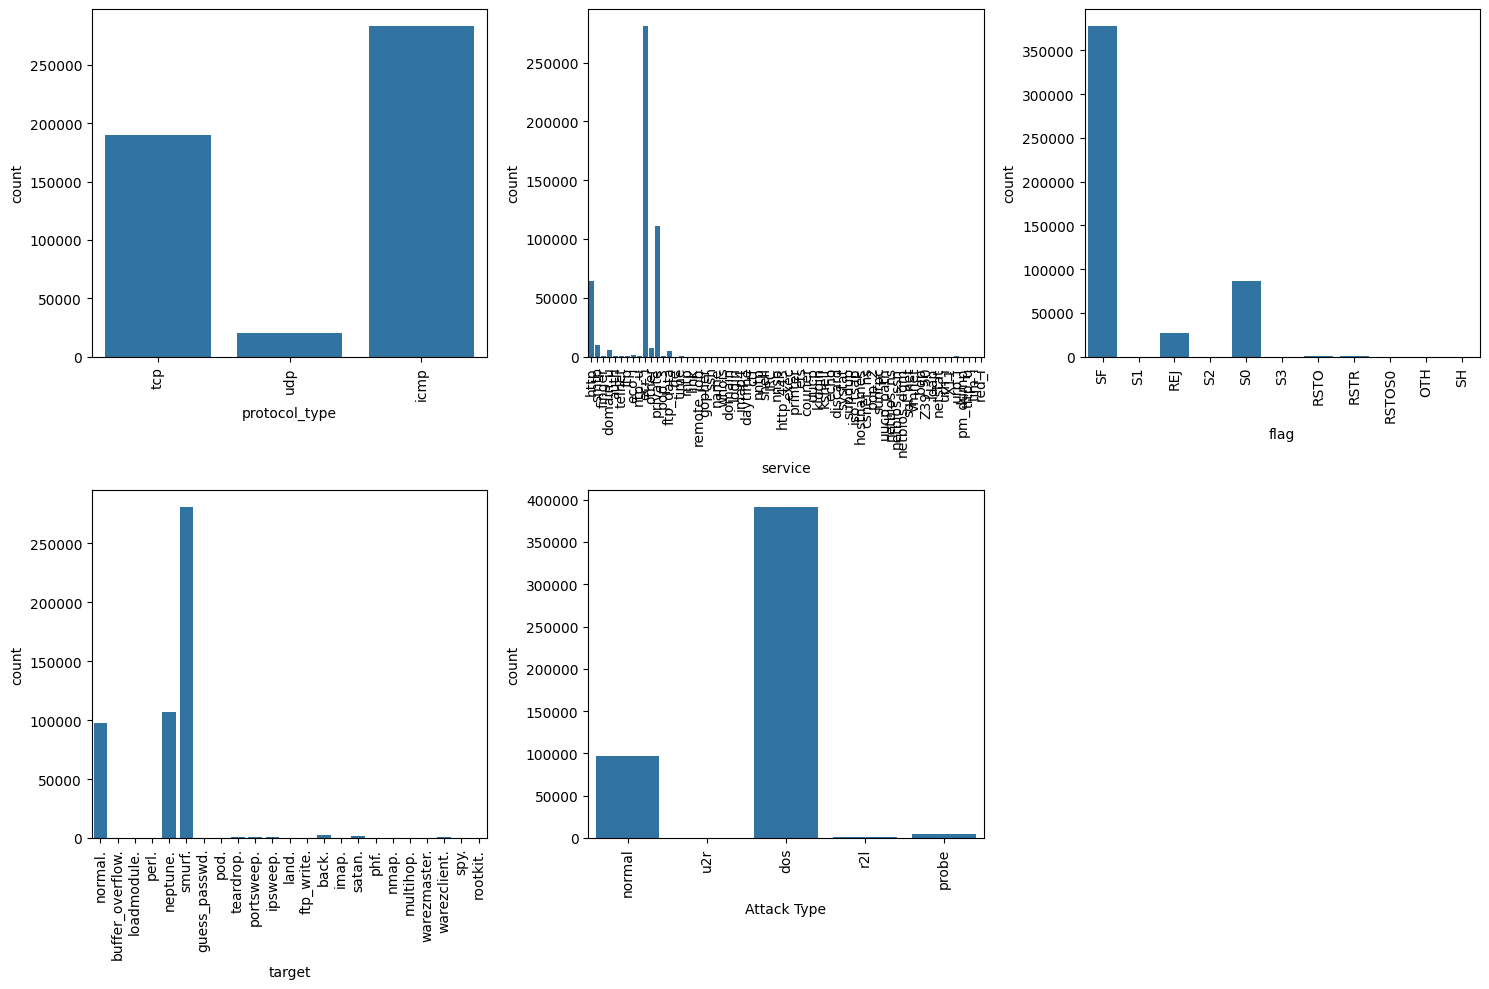

In [13]:
# Lets's draw a count plot of all the categorical columns
plt.figure(figsize=(15, 10))
index = 0
for col in obj_cols:
    index += 1
    plt.subplot(2, 3, index)
    sns.countplot(x=df[col])
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

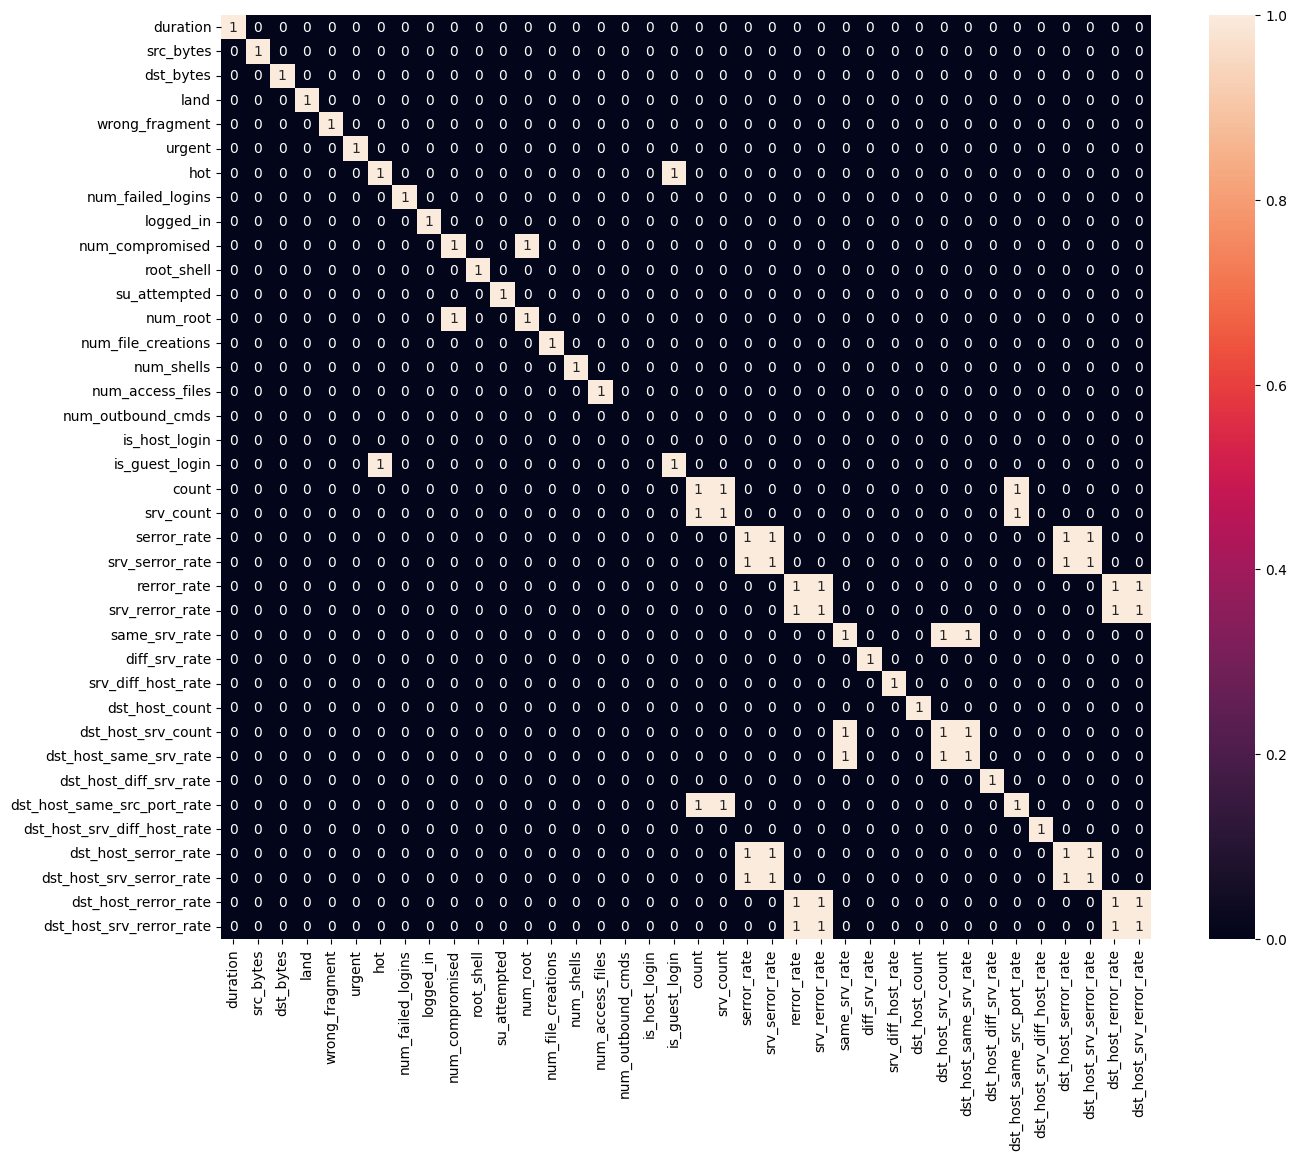

In [14]:
# Let's find correlation of all the numerical columns
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(numeric_only=True)>0.8, annot=True)
plt.show()

In [15]:
# Let's remove all the highly correlated column and some stagnant columns as well
df.drop(columns=["num_root","num_outbound_cmds","is_host_login",'hot',"count","srv_serror_rate","srv_rerror_rate","dst_host_srv_serror_rate",'dst_host_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','dst_host_same_srv_rate'], axis=1, inplace=True)

In [16]:
# Let's map our objectivee columns
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [17]:
# let's remove irrelevant rows
df.drop('service', axis = 1, inplace = True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Feature Extraction
x = df.drop(columns=['target','Attack Type'], axis=1)
y = df['Attack Type']

In [20]:
# Scale the value
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [21]:
# Split the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((395216, 28), (98805, 28), (395216,), (98805,))

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [27]:
print("Train score is:", model.score(x_train, y_train))
print("Test score is:", model.score(x_test, y_test))

Train score is: 0.8803515039876928
Test score is: 0.8802388543089925


In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(x_train, y_train)
print("Train score is:", rfc.score(x_train, y_train))
print("Test score is:", rfc.score(x_test, y_test))

Train score is: 0.9999974697380672
Test score is: 0.9997267344770001


In [29]:
from sklearn.svm import SVC

svc = SVC(gamma='scale')
svc.fit(x_train, y_train)
print("Train score is:", svc.score(x_train, y_train))
print("Test score is:", svc.score(x_test, y_test))

Train score is: 0.9946130723452492
Test score is: 0.9946561408835585


In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1200000)
lr.fit(x_train, y_train)
print("Train score is:", lr.score(x_train, y_train))
print("Test score is:", lr.score(x_test, y_test))

Train score is: 0.9927027245860491
Test score is: 0.9926015889884116
